# Data Cleaning of The CTU-13 Dataset (Neris-1)

Fidelya Fredelina - 22/496507/TK/54405

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
! pip install missingno

## Exploring Binetflow

I will only be exploring the binetflow file since they generate the binetflow file from the pcap (read: https://www.stratosphereips.org/datasets-faq). The pcap provided is only for the botnet flow, but the binetflow also includes background/normal traffic. This suggests the binetflow file is generated from the full pcap capture that is not made public for privacy reasons. Thus I think there's no need to combine between the pcap csv and binetflow csv (since they're basically telling the same story i.e redundant).

In [4]:
binetflow_df = pd.read_csv('./CTU-13-Dataset/1/capture20110810.binetflow')
binetflow_df.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
1,2011/08/10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
2,2011/08/10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
3,2011/08/10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
4,2011/08/10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt


In [4]:
binetflow_df.shape

(2824636, 15)

I really underestimated just how big this dataset is, this is just ONE scenario out of 13. It doesn't really have that huge of a dimension though, we'll explore dimension in the next section. Right now I want to focus on numerosity.

In [5]:
binetflow_df.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
Dir           object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

In [6]:
# Counting unique values

for col in binetflow_df.columns:
    print(f"Num of unique values in {col}:")
    print(binetflow_df[col].nunique())

Num of unique values in StartTime:
2824636
Num of unique values in Dur:
1073189
Num of unique values in Proto:
15
Num of unique values in SrcAddr:
542093
Num of unique values in Sport:
64752
Num of unique values in Dir:
7
Num of unique values in DstAddr:
119296
Num of unique values in Dport:
73786
Num of unique values in State:
230
Num of unique values in sTos:
5
Num of unique values in dTos:
4
Num of unique values in TotPkts:
3548
Num of unique values in TotBytes:
69949
Num of unique values in SrcBytes:
27124
Num of unique values in Label:
113


## Inconsistent Data Types

First step of cleaning is to clean inconsistent data type. For example, the StartTime feature can be converted to datetime instead. Proto (Protocol), State, Dir (Direction), sTos (Source Type of Service), and dTos (Destination Type of Service) can better be converted to categorical, judging from their number of unique values and some domain knowledge (see: https://www.systutorials.com/docs/linux/man/1-ra/ and https://en.wikipedia.org/wiki/Type_of_service). Label can also be simplied to Background and Botnet, but since this would involve string cleaning, it's going to be cleaned in the next section using more sophisticated methods. 

In [19]:
binetflow_df['StartTime'] = pd.to_datetime(binetflow_df['StartTime'])
binetflow_df['sTos'] = binetflow_df['sTos'].astype('category')
binetflow_df['dTos'] = binetflow_df['dTos'].astype('category')
binetflow_df['Proto'] = binetflow_df['Proto'].astype('category')
binetflow_df['Dir'] = binetflow_df['Dir'].astype('category')

In [6]:
binetflow_df.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011-08-10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
1,2011-08-10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT
2,2011-08-10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
3,2011-08-10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
4,2011-08-10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt


In [7]:
binetflow_df.dtypes

StartTime    datetime64[ns]
Dur                 float64
Proto              category
SrcAddr              object
Sport                object
Dir                category
DstAddr              object
Dport                object
State                object
sTos               category
dTos               category
TotPkts               int64
TotBytes              int64
SrcBytes              int64
Label                object
dtype: object

## Categorical Cleaning

Some of the categories can be hard to interpret (I am looking at you, Dir and State). This section will be dedicated for tasks that are exactly that. 

In [8]:
categorical = binetflow_df.select_dtypes(include=['category'])
for column in categorical:
    print(f"Unique values in {column}:")
    print(binetflow_df[column].value_counts())

Unique values in Proto:
Proto
udp          2270083
tcp           507557
icmp           39694
rtp             2570
rtcp            2339
igmp            1803
arp              477
ipv6-icmp         58
ipx/spx           13
esp               10
ipv6              10
udt               10
pim                7
rarp               4
unas               1
Name: count, dtype: int64
Unique values in Dir:
Dir
  <->    2191885
   ->     614958
  <-        7065
  <?>       6176
   ?>       4066
  who        481
  <?           5
Name: count, dtype: int64
Unique values in sTos:
sTos
0.0      2810723
2.0         1351
3.0          964
1.0          632
192.0        376
Name: count, dtype: int64
Unique values in dTos:
dTos
0.0    2628948
2.0        245
3.0        211
1.0         42
Name: count, dtype: int64


It seems like the categories in protocol is quite clean. Direction is almost clean (need some whitespace stripping). Turns out the ToS column has some missing values, but source ToS specifically has an out of place value (192??) 

### Direction

In [20]:
# Mapping Direction

dir_mapping = {
    '<->': 'normal bidirectional',
    '->': 'normal outbound',
    '<-': 'normal inbound',
    '<?': 'unknown inbound',
    '<?>': 'unknown bidirectional',
    '?>': 'unknown outbound',
    'who': 'special case'
}

# Function to translate 'Dir' values to human-readable categories
def translate_dir(dir_value):
    return dir_mapping.get(dir_value, 'unknown')

binetflow_df['Dir_Translated'] = binetflow_df['Dir'].str.strip().apply(translate_dir)
# print(binetflow_df[['Dir', 'Dir_Translated']].head())

# Sanity check
print("First instance of each unique value in 'Dir':")
print(binetflow_df[['Dir', 'Dir_Translated', 'Proto']].groupby('Dir').first().reset_index())

# Make the column a categorical column
binetflow_df['Dir_Translated'] = binetflow_df['Dir_Translated'].astype('category')

First instance of each unique value in 'Dir':
     Dir         Dir_Translated Proto
0     ->        normal outbound   tcp
1     ?>       unknown outbound   tcp
2     <-         normal inbound  icmp
3    <->   normal bidirectional   udp
4     <?        unknown inbound   tcp
5    <?>  unknown bidirectional   tcp
6    who           special case   arp


### State

In [10]:
print(binetflow_df['State'].unique())

['S_RA' 'SR_A' 'SR_SA' 'SRPA_SPA' 'RA_' 'SRPA_FSPA' 'FSRPA_FSPA' 'FSA_FSA'
 'S_R' 'SRA_SA' 'CON' 'FA_A' 'FA_FA' 'PA_PA' 'FPA_FRPA' 'FPA_RPA'
 'FSPA_FSPA' 'PA_A' 'FA_RA' 'PA_FRA' 'FRPA_FPA' 'FPA_FA' 'A_' 'INT' 'FA_'
 'S_SA' 'RPA_RPA' 'FPA_FPA' 'PA_RPA' 'FSPA_FSRPA' 'S_' 'SA_R' 'FPA_'
 'RPA_PA' 'URP' 'SRPA_FSRPA' 'FRPA_PA' 'URN' 'PA_' 'FA_FPA' 'SPA_FSPA'
 'PA_FRPA' 'PA_PAC' 'PA_FPA' 'FRPA_RA' 'TXD' 'RA_FA' 'FRA_' 'ECO'
 'FRA_FPA' 'URH' 'SA_' 'SRPA_SRA' 'RPA_FPA' 'FSRPA_SPA' 'PA_R' 'RA_A'
 'RED' 'SPA_SRPA' 'FA_R' 'RA_FPA' 'A_PA' 'ECR' 'FSPA_FSRA' 'SPA_SPA'
 'FSRPA_FSRPA' 'SRA_FSA' 'FPA_PA' 'FRPA_RPA' 'FPA_RA' 'FPA_FRA' 'FSPA_FSA'
 'FRA_FA' 'URFIL' '_FSPA' 'R_' 'FA_FRPA' 'SPA_FSRPA' 'FA_FRA' 'RPA_FRPA'
 'RPA_R' 'A_A' 'A_RA' 'SRPA_SA' 'SRA_RA' 'FSPA_SPA' 'RPAC_PA' 'SPA_SRA'
 'FSPAC_FSPA' 'PA_RA' 'FRPA_FA' 'A_R' 'SRPA_SRPA' 'RSP' '_FSA' 'URHPRO'
 'FSRA_FSA' 'FPA_R' 'SR_' 'FSRPA_SA' '_SRA' 'FSPA_SRPA' 'SA_FSA' 'FRPA_'
 'SPA_SA' 'FPA_A' 'FSRPA_FSA' '_SPA' 'FS_SA' 'SR_RA' 'FSRA_SA' 'SA_SRA'
 'F

That's a lot of states. After a little bit of exploring turns out the dataset creator lumps all three features (TCP flag, Non-ICMP state and ICMP state) together to create a total of 230 unique 'States' categories. To make it more readable and interpretable I think it's best to separate these values. Apart from that, the TCP flag category consists of 2 flags from the source and the destination that is separated by the underscore character. That's a lot of feature cleaning... 

#### ICMP and Non ICMP State

In the Argus documentation (see: https://www.systutorials.com/docs/linux/man/1-ra/), it lists a map of states for each of the protocols. We can subset the dataset to check if this is correct. 

In [11]:
# Subset DataFrame

icmp_df = binetflow_df[binetflow_df['Proto'] == 'icmp']
non_icmp_df = binetflow_df[binetflow_df['Proto'] != 'icmp']

print(icmp_df['State'].unique())
print(non_icmp_df['State'].unique())

['URP' 'URN' 'TXD' 'ECO' 'URH' 'RED' 'ECR' 'URFIL' 'URHPRO' 'URF' 'DNP'
 'URO' 'SRC' nan 'DCE' 'URNPRO' 'UNK']
['S_RA' 'SR_A' 'SR_SA' 'SRPA_SPA' 'RA_' 'SRPA_FSPA' 'FSRPA_FSPA' 'FSA_FSA'
 'S_R' 'SRA_SA' 'CON' 'FA_A' 'FA_FA' 'PA_PA' 'FPA_FRPA' 'FPA_RPA'
 'FSPA_FSPA' 'PA_A' 'FA_RA' 'PA_FRA' 'FRPA_FPA' 'FPA_FA' 'A_' 'INT' 'FA_'
 'S_SA' 'RPA_RPA' 'FPA_FPA' 'PA_RPA' 'FSPA_FSRPA' 'S_' 'SA_R' 'FPA_'
 'RPA_PA' 'SRPA_FSRPA' 'FRPA_PA' 'PA_' 'FA_FPA' 'SPA_FSPA' 'PA_FRPA'
 'PA_PAC' 'PA_FPA' 'FRPA_RA' 'RA_FA' 'FRA_' 'FRA_FPA' 'SA_' 'SRPA_SRA'
 'RPA_FPA' 'FSRPA_SPA' 'PA_R' 'RA_A' 'SPA_SRPA' 'FA_R' 'RA_FPA' 'A_PA'
 'FSPA_FSRA' 'SPA_SPA' 'FSRPA_FSRPA' 'SRA_FSA' 'FPA_PA' 'FRPA_RPA'
 'FPA_RA' 'FPA_FRA' 'FSPA_FSA' 'FRA_FA' '_FSPA' 'R_' 'FA_FRPA' 'SPA_FSRPA'
 'FA_FRA' 'RPA_FRPA' 'RPA_R' 'A_A' 'A_RA' 'SRPA_SA' 'SRA_RA' 'FSPA_SPA'
 'RPAC_PA' 'SPA_SRA' 'FSPAC_FSPA' 'PA_RA' 'FRPA_FA' 'A_R' 'SRPA_SRPA'
 'RSP' '_FSA' 'FSRA_FSA' 'FPA_R' 'SR_' 'FSRPA_SA' '_SRA' 'FSPA_SRPA'
 'SA_FSA' 'FRPA_' 'SPA_SA' 'FPA_A' 'FSRPA

#### TCP and Non TCP State

We can further subset the non_icmp_df to extract the TCP flags by first subsetting the protocol to be equal to TCP and print out the unique values of State

In [12]:
tcp_df = non_icmp_df[non_icmp_df['Proto'] == 'tcp']
non_tcp_icmp_df = non_icmp_df[non_icmp_df['Proto'] != 'tcp']

print(tcp_df['State'].unique())
print(non_tcp_icmp_df['State'].unique())

['S_RA' 'SR_A' 'SR_SA' 'SRPA_SPA' 'RA_' 'SRPA_FSPA' 'FSRPA_FSPA' 'FSA_FSA'
 'S_R' 'SRA_SA' 'FA_A' 'FA_FA' 'PA_PA' 'FPA_FRPA' 'FPA_RPA' 'FSPA_FSPA'
 'PA_A' 'FA_RA' 'PA_FRA' 'FRPA_FPA' 'FPA_FA' 'A_' 'FA_' 'S_SA' 'RPA_RPA'
 'FPA_FPA' 'PA_RPA' 'FSPA_FSRPA' 'S_' 'SA_R' 'FPA_' 'RPA_PA' 'SRPA_FSRPA'
 'FRPA_PA' 'PA_' 'FA_FPA' 'SPA_FSPA' 'PA_FRPA' 'PA_PAC' 'PA_FPA' 'FRPA_RA'
 'RA_FA' 'FRA_' 'FRA_FPA' 'SA_' 'SRPA_SRA' 'RPA_FPA' 'FSRPA_SPA' 'PA_R'
 'RA_A' 'SPA_SRPA' 'FA_R' 'RA_FPA' 'A_PA' 'FSPA_FSRA' 'SPA_SPA'
 'FSRPA_FSRPA' 'SRA_FSA' 'FPA_PA' 'FRPA_RPA' 'FPA_RA' 'FPA_FRA' 'FSPA_FSA'
 'FRA_FA' '_FSPA' 'R_' 'FA_FRPA' 'SPA_FSRPA' 'FA_FRA' 'RPA_FRPA' 'RPA_R'
 'A_A' 'A_RA' 'SRPA_SA' 'SRA_RA' 'FSPA_SPA' 'RPAC_PA' 'SPA_SRA'
 'FSPAC_FSPA' 'PA_RA' 'FRPA_FA' 'A_R' 'SRPA_SRPA' '_FSA' 'FSRA_FSA'
 'FPA_R' 'SR_' 'FSRPA_SA' '_SRA' 'FSPA_SRPA' 'SA_FSA' 'FRPA_' 'SPA_SA'
 'FPA_A' 'FSRPA_FSA' '_SPA' 'FS_SA' 'SR_RA' 'FSRA_SA' 'SA_SRA' 'FSA_SRA'
 'FRPA_FRPA' 'SRPA_FSA' 'SPAC_SPA' 'SA_RA' 'FRA_R' 'FSPA_SRA' '_SRPA'
 

Notice how TCP flag makes up most of the State column (207 possible flags from 230 total unique values of State)?

In [ ]:
# Warning to future self: DO NOT RUN THIS CELL!!! JUST READ THE NEW CSV FILE....
# Tidying it up together

icmp_states_list = icmp_df['State'].unique()
non_icmp_states_list = non_tcp_icmp_df['State'].unique()

# Create new columns
binetflow_df['tcp_flags'] = pd.NA
binetflow_df['icmp_states'] = pd.NA
binetflow_df['non_icmp_states'] = pd.NA

# Classify each state
def classify_state(state_value):
    if pd.isna(state_value):
        return pd.NA, pd.NA, pd.NA

    tcp_flags = []
    icmp_states = []
    non_icmp_states = []

    if state_value in icmp_states_list:
        icmp_states.append(state_value)
    elif state_value in non_icmp_states_list:
        non_icmp_states.append(state_value)
    else:
        tcp_flags.append(state_value)

    return ' '.join(icmp_states), ' '.join(non_icmp_states), ' '.join(tcp_flags)

# binetflow_df['State'].fillna('None', inplace=True)
binetflow_df[['icmp_states', 'non_icmp_states', 'tcp_flags']] = binetflow_df['State'].apply(classify_state).apply(pd.Series)

# Print the updated DataFrame
print(binetflow_df[['State', 'tcp_flags', 'icmp_states', 'non_icmp_states']])

In [3]:
# Checkpoint 1
# Saving the new binetflow_df because last operation takes so long to complete
# binetflow_df.to_csv('binetflow.csv', index=False)

# Loading the saved new binetflow_df
binetflow_df = pd.read_csv('binetflow.csv')
binetflow_df.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Dir_Translated,tcp_flags,icmp_states,non_icmp_states
0,2011-08-10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT,normal outbound,S_RA,NaN,NaN
1,2011-08-10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,->,147.32.84.59,6881,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT,normal outbound,S_RA,NaN,NaN
2,2011-08-10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt,normal outbound,SR_A,NaN,NaN
3,2011-08-10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt,normal outbound,SR_A,NaN,NaN
4,2011-08-10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,->,77.75.73.33,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt,normal outbound,SR_A,NaN,NaN


In [4]:
# Sanity Check
print(binetflow_df[binetflow_df['Proto'] == 'icmp']['icmp_states'].unique())
print(binetflow_df[(binetflow_df['Proto'] != 'icmp') & (binetflow_df['Proto'] != 'tcp')]['non_icmp_states'].unique())
# print(binetflow_df[binetflow_df['Proto'] == 'tcp']['tcp_flags'].unique()) commenting this one bcs it's long

['URP' 'URN' 'TXD' 'ECO' 'URH' 'RED' 'ECR' 'URFIL' 'URHPRO' 'URF' 'DNP'
 'URO' 'SRC' nan 'DCE' 'URNPRO' 'UNK']
['CON' 'INT' 'RSP' 'NNS' 'NRS' 'REQ' 'MRQ' nan]


#### Separating Source and Destination Flags

In [5]:
# Split 'tcp_state' column into source and destination
binetflow_df[['flag_source', 'flag_destination']] = binetflow_df['tcp_flags'].str.split('_', n=1, expand=True)

In [6]:
binetflow_df[['tcp_flags', 'flag_source', 'flag_destination']]

,tcp_flags,flag_source,flag_destination
0,S_RA,S,RA
1,S_RA,S,RA
2,SR_A,SR,A
3,SR_A,SR,A
4,SR_A,SR,A
...,...,...,...
2824631,NaN,NaN,NaN
2824632,NaN,NaN,NaN
2824633,S_,S,
2824634,NaN,NaN,NaN


#### Mapping States

After all of that classifying, it's time to map the values to a more human readable format. I hope all those efforts won't go to waste :"D (foreshadowing krn kyknya bakal gk ngaruh soalnya banyak null)

In [7]:
# Define mappings for TCP flags
tcp_flags = {
    'F': 'Fin',
    'S': 'Syn',
    'R': 'Reset',
    'P': 'Push',
    'A': 'Ack',
    'U': 'Urgent Pointer',
    '7': 'Undefined 7th',
    '8': 'Undefined 8th'
}

# Define mappings for connection states
non_icmp_states = {
    'REQ': 'Requested',
    'INT': 'Initial',
    'ACC': 'Accepted',
    'EST': 'Established',
    'CON': 'Connected',
    'CLO': 'Closed',
    'TIM': 'Timeout'
}

# Define mappings for connection states (ICMP)
icmp_states = {
    "ECO": "Echo Request",
    "ECR": "Echo Reply",
    "SRC": "Source Quench",
    "RED": "Redirect",
    "RTA": "Router Advertisement",
    "RTS": "Router Solicitation",
    "TXD": "Time Exceeded",
    "PAR": "Parameter Problem",
    "TST": "Time Stamp Request",
    "TSR": "Time Stamp Reply",
    "IRQ": "Information Request",
    "IRR": "Information Reply",
    "MAS": "Mask Request",
    "MSR": "Mask Reply",
    "URN": "Unreachable network",
    "URH": "Unreachable host",
    "URP": "Unreachable port",
    "URF": "Unreachable need fragmentation",
    "URS": "Unreachable source failed",
    "URNU": "Unreachable dst network unknown",
    "URHU": "Unreachable dst host unknown",
    "URISO": "Unreachable source host isolated",
    "URNPRO": "Unreachable network administrative prohibited",
    "URHPRO": "Unreachable host administrative prohibited",
    "URNTOS": "Unreachable network TOS prohibited",
    "URHTOS": "Unreachable host TOS prohibited",
    "URFIL": "Unreachable administrative filter",
    "URPRE": "Unreachable precedence violation",
    "URCUT": "Unreachable precedence cutoff"
}

In [8]:
# TCP Flags Parser
def tcp_parser(state_value):
    if pd.isna(state_value) or not isinstance(state_value, str):
        return ''  # Return empty string or a default value
    
    flags = []
    for char in state_value:
        if char in tcp_flags:
            flags.append(tcp_flags[char])
    return ' '.join(flags).strip()

# ICMP States Parser
def icmp_parser(state_value):
    if pd.isna(state_value) or not isinstance(state_value, str):
        return ''  # Return empty string or a default value
    
    state_value = state_value.strip()  # Clean up whitespace
    for length in range(6, 0, -1):  # Look for ICMP state up to 6 characters long
        for i in range(len(state_value) - length + 1):
            sub_state = state_value[i:i + length]
            if sub_state in icmp_states:
                return icmp_states[sub_state]
    return ''

# Non-ICMP States Parser
def non_icmp_parser(state_value):
    if pd.isna(state_value) or not isinstance(state_value, str):
        return ''  # Return empty string or a default value
    
    state_value = state_value.strip()  # Clean up whitespace
    for length in range(6, 0, -1):  # Look for non-ICMP state up to 6 characters long
        for i in range(len(state_value) - length + 1):
            sub_state = state_value[i:i + length]
            if sub_state in non_icmp_states:
                return non_icmp_states[sub_state]
    return ''

# Apply parser to columns
binetflow_df['parsed_flags_source'] = binetflow_df['flag_source'].apply(tcp_parser)
binetflow_df['parsed_flags_dest'] = binetflow_df['flag_destination'].apply(tcp_parser)
binetflow_df['parsed_icmp_state'] = binetflow_df['icmp_states'].apply(icmp_parser)
binetflow_df['parsed_state'] = binetflow_df['non_icmp_states'].apply(non_icmp_parser)

# Sanity check
print("First instance of each unique value in 'State':")
print(binetflow_df[binetflow_df['Proto'] == 'tcp'][['parsed_flags_source', 'parsed_flags_dest', 'flag_source', 'flag_destination']])
print(binetflow_df[(binetflow_df['Proto'] != 'icmp') & (binetflow_df['Proto'] != 'tcp')][['non_icmp_states', 'parsed_state']])
print(binetflow_df[binetflow_df['Proto'] == 'icmp'][['icmp_states', 'parsed_icmp_state']])

First instance of each unique value in 'State':
        parsed_flags_source parsed_flags_dest flag_source flag_destination
0                       Syn         Reset Ack           S               RA
1                       Syn         Reset Ack           S               RA
2                 Syn Reset               Ack          SR                A
3                 Syn Reset               Ack          SR                A
4                 Syn Reset               Ack          SR                A
...                     ...               ...         ...              ...
2824594        Syn Push Ack      Syn Push Ack         SPA              SPA
2824603        Syn Push Ack      Syn Push Ack         SPA              SPA
2824605        Syn Push Ack           Syn Ack         SPA               SA
2824613        Syn Push Ack           Syn Ack         SPA               SA
2824633                 Syn                             S                 

[507557 rows x 4 columns]
        non_icmp_states p

### Label

The label is quite confusing. Almost every instance has the string 'Background' but it has more information about whether the connection originated from or destined to a legitimate host or botnet. See: https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/ for more information about how the dataset is originally labelled.

In [10]:
# Function to map the labels based on the conditions
def classify_label(label):
    if 'LEGITIMATE' in label:
        return 'LEGITIMATE'
    elif 'Botnet' in label:
        return 'Botnet'
    else:
        return 'Background'

# Apply the function to the Label column to create a new actual_label column
binetflow_df['actual_label'] = binetflow_df['Label'].apply(classify_label)

In [16]:
# Check if the new column was created successfully
print(binetflow_df['actual_label'].value_counts())
print(binetflow_df[binetflow_df['actual_label'] == 'Background']['Label'].head())
print(binetflow_df[binetflow_df['actual_label'] == 'Botnet']['Label'].head())

actual_label
Background    2783675
Botnet          40961
Name: count, dtype: int64
0    flow=Background-Established-cmpgw-CVUT
1    flow=Background-Established-cmpgw-CVUT
2               flow=Background-TCP-Attempt
3               flow=Background-TCP-Attempt
4               flow=Background-TCP-Attempt
Name: Label, dtype: object
675613                         flow=From-Botnet-V42-UDP-DNS
675948                         flow=From-Botnet-V42-UDP-DNS
675953    flow=From-Botnet-V42-TCP-HTTP-Google-Net-Estab...
690001                         flow=From-Botnet-V42-UDP-DNS
690036                 flow=From-Botnet-V42-TCP-Established
Name: Label, dtype: object


There's no 'Legitimate' label created. Seems like the dataset creator is a little bit inconsistent with how they label their dataset.... 

In [21]:
# Make the new actual_label a category column

binetflow_df['actual_label'] = binetflow_df['actual_label'].astype('category')
binetflow_df.dtypes

StartTime              datetime64[ns]
Dur                           float64
Proto                        category
SrcAddr                        object
Sport                          object
Dir                          category
DstAddr                        object
Dport                          object
State                          object
sTos                         category
dTos                         category
TotPkts                         int64
TotBytes                        int64
SrcBytes                        int64
Label                          object
Dir_Translated               category
tcp_flags                      object
icmp_states                    object
non_icmp_states                object
flag_source                    object
flag_destination               object
parsed_flags_source            object
parsed_flags_dest              object
parsed_icmp_state              object
parsed_state                   object
actual_label                 category
dtype: objec

## Inconsistent Data

Time to explore null values, outliers, duplicates, and many weird inconsistencies!

In [25]:
binetflow_df.shape

(2824636, 26)

We come up with a lot of columns idea from the last section. To simplify the dataset and getting rid of redundant features, I'm going to subset the dataframe and save it as a separate .csv for a second checkpoint. 

In [27]:
columns_redundant = ['Dir', 'State', 'Label', 'tcp_flags', 'icmp_states', 'non_icmp_states', 'flag_source', 'flag_destination']
binetflow_clean_df = binetflow_df.drop(columns=columns_redundant)
binetflow_clean_df.head()

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Dir_Translated,parsed_flags_source,parsed_flags_dest,parsed_icmp_state,parsed_state,actual_label
0,2011-08-10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,147.32.84.59,6881,0.0,0.0,4,276,156,normal outbound,Syn,Reset Ack,,,Background
1,2011-08-10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,147.32.84.59,6881,0.0,0.0,4,276,156,normal outbound,Syn,Reset Ack,,,Background
2,2011-08-10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,77.75.73.33,80,0.0,0.0,3,182,122,normal outbound,Syn Reset,Ack,,,Background
3,2011-08-10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,77.75.73.33,80,0.0,0.0,3,182,122,normal outbound,Syn Reset,Ack,,,Background
4,2011-08-10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,77.75.73.33,80,0.0,0.0,3,182,122,normal outbound,Syn Reset,Ack,,,Background


In [2]:
# Checkpoint 2
# Saving dataframe to simplify process
# binetflow_clean_df.to_csv('cleaner_binetflow.csv', index=False)

binetflow_clean_df = pd.read_csv('cleaner_binetflow.csv')

### Null Values

Visualizing null values in each of the columns to investigate if data is missing at random or not. Impute missing values based on insights gathered from earlier.

<Figure size 1200x800 with 0 Axes>

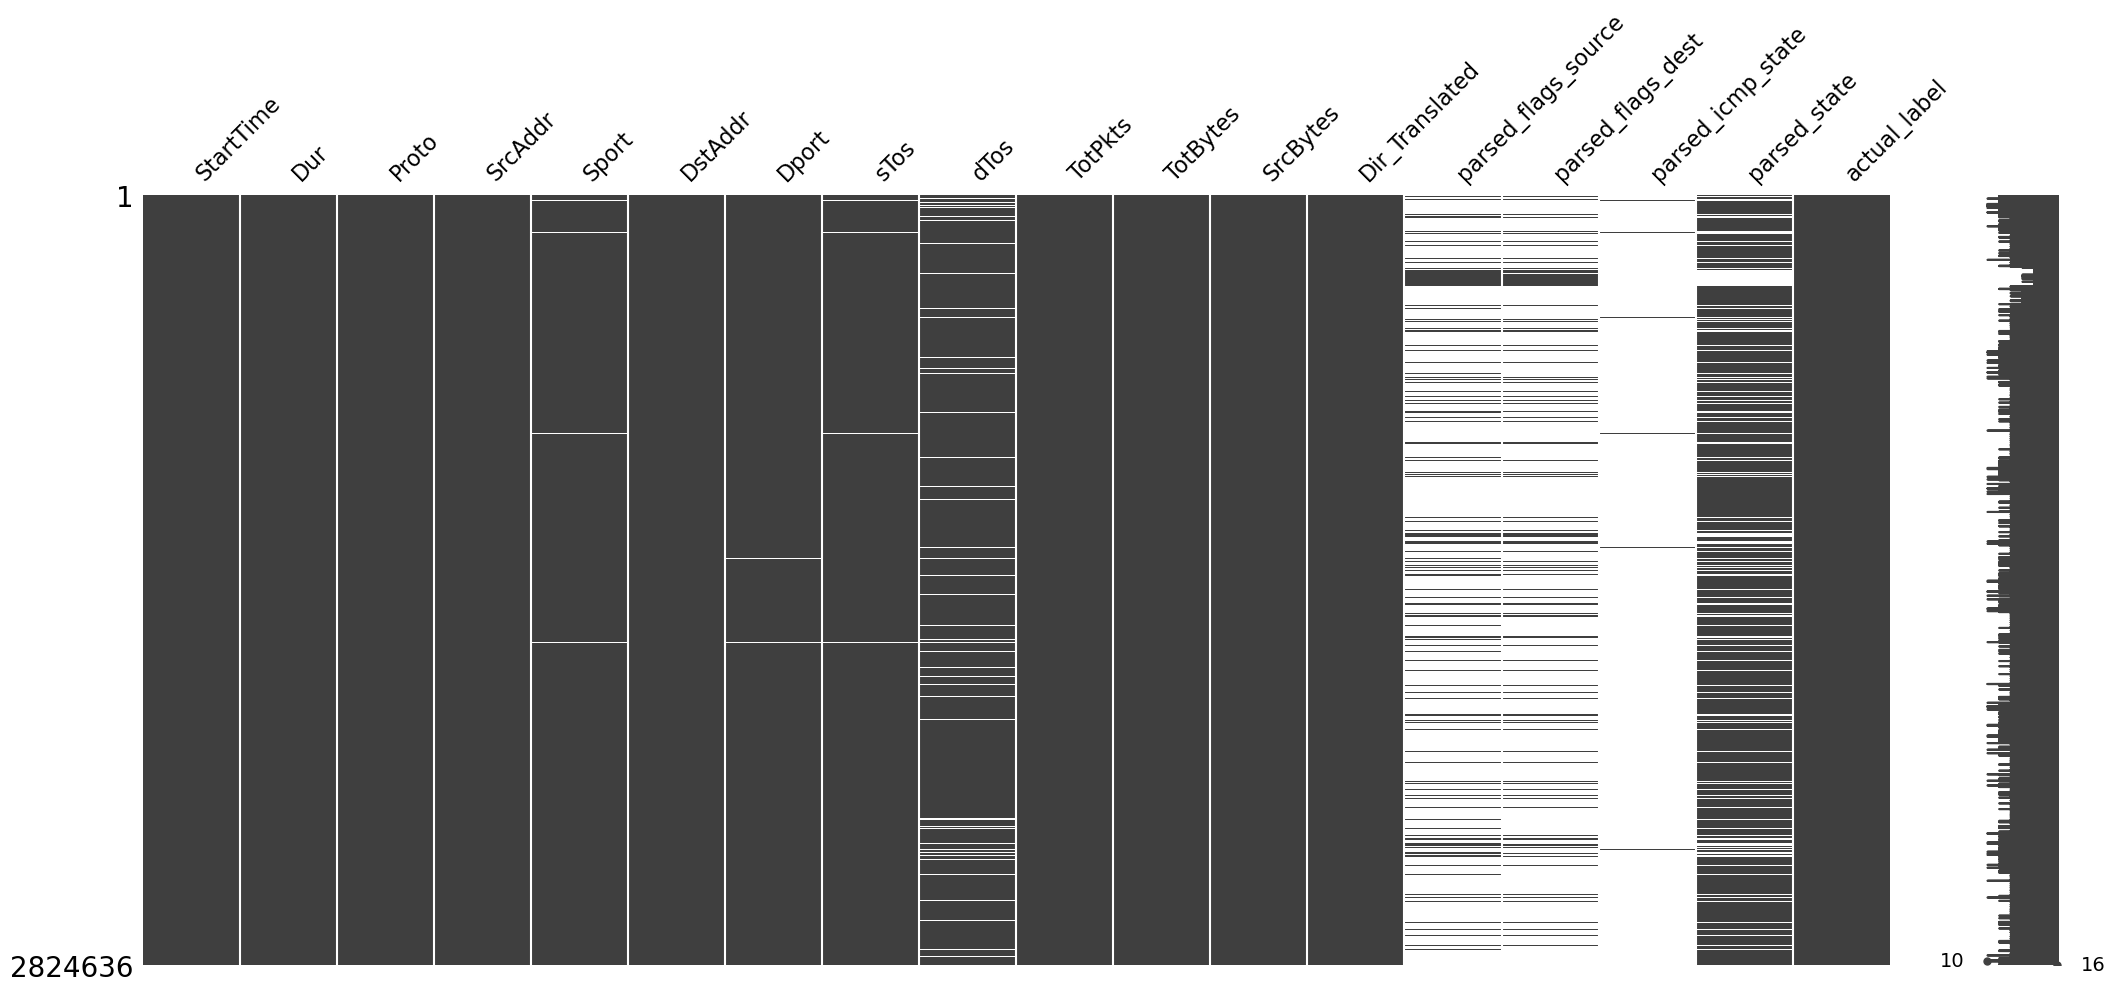

In [33]:
import missingno as msno

# Visualize missing values with a matrix
def visualize_missing_matrix(df):
    plt.figure(figsize=(12, 8))
    msno.matrix(df)
    plt.show()

# Call the function on your DataFrame
visualize_missing_matrix(binetflow_clean_df)

This visualization helps us to see null values more easily. Some columns don't really have many missing columns, some have moderate amount of it, but some are practically sparse, especially the state columns. 

I am particularly interested in the dTos column. How can it has more missing values than its counterpart (source Tos) when they're telling the same story? (Type of Service in IPv4 header). I will be exploring them in the next sections before deciding what I should do.

Recall that on the last section we divide states into TCP flags, ICMP state, and non-ICMP non-TCP states. Since ICMP communication only makes a small portion of the whole network, it's no wonder the ICMP state column mainly consists of null values. Therefore, this is a case of missing data not at random. I think it's wise to combine the states between non-ICMP and ICMP states, but leave the TCP flags columns alone. We can then impute the missing values accordingly. 

### State

In [3]:
# Combine 'icmp_state' and 'state' columns
binetflow_clean_df['combined_state'] = binetflow_clean_df['parsed_icmp_state'].fillna(binetflow_clean_df['parsed_state'])

# Sanity Check
print(binetflow_clean_df['combined_state'])

# Drop redundant column
binetflow_clean_df.drop(columns=['parsed_icmp_state', 'parsed_state'], inplace=True)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
2824631    Connected
2824632    Connected
2824633          NaN
2824634    Connected
2824635    Connected
Name: combined_state, Length: 2824636, dtype: object


In [4]:
print(type(binetflow_clean_df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
# Check for missing states by protocol
missing_state_proto = binetflow_clean_df[binetflow_clean_df['combined_state'].isna()]['Proto'].value_counts()/len(binetflow_clean_df['combined_state'])
missing_sflags_proto = binetflow_clean_df[binetflow_clean_df['parsed_flags_source'].isna()]['Proto'].value_counts()/len(binetflow_clean_df['parsed_flags_source'])
missing_dflags_proto = binetflow_clean_df[binetflow_clean_df['parsed_flags_dest'].isna()]['Proto'].value_counts()/len(binetflow_clean_df['parsed_flags_dest'])

# Print the result
print(missing_state_proto)
print(missing_sflags_proto)
print(missing_dflags_proto)

Proto
tcp          0.179689
arp          0.000029
ipv6-icmp    0.000021
udp          0.000012
icmp         0.000005
Name: count, dtype: float64
Proto
udp          8.036728e-01
icmp         1.405278e-02
tcp          1.090406e-03
rtp          9.098517e-04
rtcp         8.280713e-04
igmp         6.383123e-04
arp          1.688713e-04
ipv6-icmp    2.053362e-05
ipx/spx      4.602363e-06
ipv6         3.540279e-06
udt          3.540279e-06
esp          3.540279e-06
pim          2.478195e-06
rarp         1.416112e-06
unas         3.540279e-07
Name: count, dtype: float64
Proto
udp          8.036728e-01
tcp          2.732104e-02
icmp         1.405278e-02
rtp          9.098517e-04
rtcp         8.280713e-04
igmp         6.383123e-04
arp          1.688713e-04
ipv6-icmp    2.053362e-05
ipx/spx      4.602363e-06
ipv6         3.540279e-06
udt          3.540279e-06
esp          3.540279e-06
pim          2.478195e-06
rarp         1.416112e-06
unas         3.540279e-07
Name: count, dtype: float64


It seems like in both cases, there are still legitimate missing values. In the combined_state columns, there are still instances of communication with icmp and icmpv6 protocols that don't have a state value. In both source and destination flags, there are still instances of communcation with tcp protocols that don't have a state value, but the amount are different between source and destination.

In [4]:
# Imputing missing values with 'Invalid' for missing values not at random

# Imputing states
protocols = ['tcp', 'arp'] # tcp has its own flags and arp doesn't have states
binetflow_clean_df['combined_state'] = binetflow_clean_df.apply(
    lambda row: 'Invalid' if pd.isna(row['combined_state']) and row['Proto'] in protocols else row['combined_state'], axis=1
)

# Imputing flags
binetflow_clean_df['parsed_flags_source'] = binetflow_clean_df.apply(
    lambda row: 'Invalid' if pd.isna(row['parsed_flags_source']) and row['Proto'] != 'tcp' else row['parsed_flags_source'], axis=1
)

binetflow_clean_df['parsed_flags_dest'] = binetflow_clean_df.apply(
    lambda row: 'Invalid' if pd.isna(row['parsed_flags_dest']) and row['Proto'] != 'tcp' else row['parsed_flags_dest'], axis=1
)

In [5]:
# Check for missing states by protocol after imputation
missing_state_proto = binetflow_clean_df[binetflow_clean_df['combined_state'].isna()]['Proto'].value_counts()/len(binetflow_clean_df['combined_state'])
missing_sflags_proto = binetflow_clean_df[binetflow_clean_df['parsed_flags_source'].isna()]['Proto'].value_counts()/len(binetflow_clean_df['parsed_flags_source'])
missing_dflags_proto = binetflow_clean_df[binetflow_clean_df['parsed_flags_dest'].isna()]['Proto'].value_counts()/len(binetflow_clean_df['parsed_flags_dest'])

# Print the result
print(missing_state_proto)
print(missing_sflags_proto)
print(missing_dflags_proto)

Proto
ipv6-icmp    0.000021
udp          0.000012
icmp         0.000005
Name: count, dtype: float64
Proto
tcp    0.00109
Name: count, dtype: float64
Proto
tcp    0.027321
Name: count, dtype: float64


There are more missing values in destination flags than in source flags. But it's okay, there are legit reasons why a communication can only have a source flag but not a destination flag. It can be caused by:
- Unidirectional communcation (only outbound traffic)
- Packet loss
- Initiation of the three-way handshake (more info: https://developer.mozilla.org/en-US/docs/Glossary/TCP_handshake)

In [30]:
# Check for missing flags in source or destination for TCP traffic
missing_flags_source = binetflow_clean_df[(binetflow_clean_df['Proto'] == 'tcp') & binetflow_clean_df['parsed_flags_source'].isna()]
missing_flags_dest = binetflow_clean_df[(binetflow_clean_df['Proto'] == 'tcp') & binetflow_clean_df['parsed_flags_dest'].isna()]
print(missing_flags_source['parsed_flags_dest'].unique())
print(missing_flags_dest['parsed_flags_source'].unique())

['Fin Syn Push Ack' 'Fin Syn Ack' 'Syn Reset Ack' 'Syn Push Ack'
 'Syn Reset Push Ack' 'Syn Ack' 'Push Ack' 'Reset' 'Fin Push Ack'
 'Fin Reset Push Ack' 'Fin Ack' 'Fin Syn Reset Push Ack' 'Reset Ack']
['Reset Ack' 'Ack' 'Fin Ack' 'Syn' 'Fin Push Ack' 'Push Ack'
 'Fin Reset Ack' 'Syn Ack' 'Reset' 'Syn Reset' 'Fin Reset Push Ack'
 'Syn Reset Ack' 'Fin Syn' 'Reset Push Ack' 'Fin Syn Ack' 'Syn Push Ack']


I'm sorry if this project becomes a crash course in Computer Networks but basically this confirms that missing flags in one direction (source or destination) comes from packet loss (Reset), communcation termination (Fin), and a three-way handshake initiation (Syn Ack). Now to impute these values:

In [11]:
import pandas as pd

def impute_flags(row):
    # Create a copy of the row to avoid modifying the original data
    imputed_row = row.copy()
    
    # Define the rules for imputation
    if pd.isna(row['parsed_flags_source']) and pd.notna(row['parsed_flags_dest']):
        if 'Syn' in row['parsed_flags_dest']:
            imputed_row['parsed_flags_source'] = 'three-way handshake'
        elif 'Fin' in row['parsed_flags_dest']:
            imputed_row['parsed_flags_source'] = 'finished'
        elif 'Reset' in row['parsed_flags_dest']:
            imputed_row['parsed_flags_source'] = 'terminated'
        elif 'Push' in row['parsed_flags_dest']:
            imputed_row['parsed_flags_source'] = 'Ack'
    
    if pd.isna(row['parsed_flags_dest']) and pd.notna(row['parsed_flags_source']):
        if 'Syn' in row['parsed_flags_source']:
            imputed_row['parsed_flags_dest'] = 'three-way handshake'
        elif 'Fin' in row['parsed_flags_source']:
            imputed_row['parsed_flags_dest'] = 'finished'
        elif 'Reset' in row['parsed_flags_source']:
            imputed_row['parsed_flags_dest'] = 'terminated'
        elif 'Push' in row['parsed_flags_source']:
            imputed_row['parsed_flags_dest'] = 'Ack'
    
    return imputed_row

# Apply the function to the DataFrame
def apply_imputation(df):
    df = df.apply(lambda row: impute_flags(row), axis=1)
    return df

# Assuming you have columns 'source_flags' and 'destination_flags'
binetflow_clean_df = apply_imputation(binetflow_clean_df)

### Type of Service

In [20]:
# Check for missing dTos values based on direction
missing_dtos_dir = binetflow_clean_df[binetflow_clean_df['dTos'].isna()].groupby('Dir_Translated').size()/len(binetflow_clean_df['dTos'])

# Compare with sTos values
missing_stos_dir = binetflow_clean_df[binetflow_clean_df['sTos'].isna()].groupby('Dir_Translated').size()/len(binetflow_clean_df['sTos'])

print(missing_dtos_dir)
print(missing_stos_dir)

Dir_Translated
normal outbound     0.067494
special case        0.000170
unknown outbound    0.001438
dtype: float64
Dir_Translated
normal inbound     0.002489
normal outbound    0.001090
special case       0.000170
dtype: float64


When grouped with direction, in both source and destination ToS, we have a consistent 481 missing values for a 'special case' direction. Recall from the section before, we translated 'who' to 'special case' in Dir. This is because a direction of 'who' usually tells us it's a communication between 2 devices using Address Resolution Protocol (ARP, more information: https://en.wikipedia.org/wiki/Address_Resolution_Protocol). This protocol is used to discover the MAC address of a device, which is a Layer 2/Data Link component. Recall that IP address is used when we're talking about Layer 3 and beyond, so it makes sense if a communication using the ARP protocol doesn't have any ToS value. 

Apart from that, outbound or inbound **only** traffics are more likely to disregard ToS value, with the most occurance of missing ToS value in normal outbound traffics. Let's assume for simplicity, if an outbound/inbound only traffic has a missing value in destination or source ToS, it probably has the same value of ToS to its counterpart. That is, if in an outbound traffic the destination ToS is missing, then we can safely assume that the missing value can be imputed by the value from the source ToS of that traffic. Same goes with inbound traffic.

In [6]:
# Imputing ARP communication based on Dir_Transalted with -1.0
binetflow_clean_df['dTos'] = binetflow_clean_df.apply(
    lambda row: -1.0 if pd.isna(row['dTos']) and row['Dir_Translated'] == 'special case' else row['dTos'], axis=1
)

binetflow_clean_df['sTos'] = binetflow_clean_df.apply(
    lambda row: -1.0 if pd.isna(row['sTos']) and row['Dir_Translated'] == 'special case' else row['sTos'], axis=1
)

# Impute missing inbound/outbound only 
# Impute missing dTos with sTos
binetflow_clean_df['dTos'] = binetflow_clean_df.apply(
    lambda row: row['sTos'] if pd.isna(row['dTos']) and not pd.isna(row['sTos']) else row['dTos'], axis=1
)

# Impute missing sTos with dTos
binetflow_clean_df['sTos'] = binetflow_clean_df.apply(
    lambda row: row['dTos'] if pd.isna(row['sTos']) and not pd.isna(row['dTos']) else row['sTos'], axis=1
)

In [7]:
# Check for missing dTos values based on direction after imputation
missing_dtos_dir = binetflow_clean_df[binetflow_clean_df['dTos'].isna()].groupby('Dir_Translated').size()/len(binetflow_clean_df['dTos'])

# Compare with sTos values
missing_stos_dir = binetflow_clean_df[binetflow_clean_df['sTos'].isna()].groupby('Dir_Translated').size()/len(binetflow_clean_df['sTos'])

print(missing_dtos_dir)
print(missing_stos_dir)

Dir_Translated
normal outbound    0.000005
dtype: float64
Dir_Translated
normal outbound    0.000005
dtype: float64


### Port

In [8]:
# Check for missing sport by protocol
missing_sport_proto = binetflow_clean_df[binetflow_clean_df['Sport'].isna()].groupby('Proto').size()

# Compare with dport values
missing_dport_proto = binetflow_clean_df[binetflow_clean_df['Dport'].isna()].groupby('Proto').size()

print(missing_sport_proto)
print(missing_dport_proto)

Proto
arp         477
esp          10
icmp       7031
igmp       1803
ipv6         10
ipx/spx      13
pim           7
rarp          4
tcp           1
udp          22
unas          1
dtype: int64
Proto
arp           477
icmp         1317
igmp         1803
ipv6           10
ipv6-icmp      58
ipx/spx        13
pim             7
rarp            4
tcp           675
udp            25
unas            1
dtype: int64


As expected, most of the protocols with missing port numbers are protocols from Layer 2 and 3 of the OSI model, which don't require port numbers to communicate. Port numbers are usually used in higher layers such as the Transport layer (TCP/UDP) to differentiate services/applications used by the client and server (80: HTTP, 22: SSH, 21: FTP, 53: DNS, etc). What interesting is, there are still missing port number values for communcation over the TCP and UDP protocols that supposed to have port numbers. We need to investigate that further but for now, the rest of the missing values can be imputed by 'invalid' or something like that.

In [8]:
# Imputing ports with 'Not Applicable' for data missing not at random
protocols = ['tcp', 'udp'] # valid protocols for port numbers 
binetflow_clean_df['Sport'] = binetflow_clean_df.apply(
    lambda row: -1 if pd.isna(row['Sport']) and row['Proto'] not in protocols else row['Sport'], axis=1
)

binetflow_clean_df['Dport'] = binetflow_clean_df.apply(
    lambda row: -1 if pd.isna(row['Dport']) and row['Proto'] not in protocols else row['Dport'], axis=1
)

In [21]:
# Check for missing sport by protocol
missing_sport_proto = binetflow_clean_df[binetflow_clean_df['Sport'].isna()].groupby('Proto').size()/len(binetflow_clean_df['Sport'])

# Compare with dport values
missing_dport_proto = binetflow_clean_df[binetflow_clean_df['Dport'].isna()].groupby('Proto').size()/len(binetflow_clean_df['Dport'])

print(missing_sport_proto)
print(missing_dport_proto)

Proto
tcp    3.540279e-07
udp    7.788614e-06
dtype: float64
Proto
tcp    0.000239
udp    0.000009
dtype: float64


In [28]:
tcp_missing_df = binetflow_clean_df[(binetflow_clean_df['Dport'].isna()) & (binetflow_clean_df['Proto'] == 'tcp')]
print(tcp_missing_df[['Sport', 'Dport']])
print(tcp_missing_df['actual_label'].unique())

         Sport Dport
6372     42823   NaN
7203     42824   NaN
15701    52823   NaN
16477    58689   NaN
17201    58690   NaN
...        ...   ...
2808463  50726   NaN
2809485  38205   NaN
2810235  33116   NaN
2810841  33117   NaN
2811356  45270   NaN

[675 rows x 2 columns]
['Background']


<Figure size 1200x800 with 0 Axes>

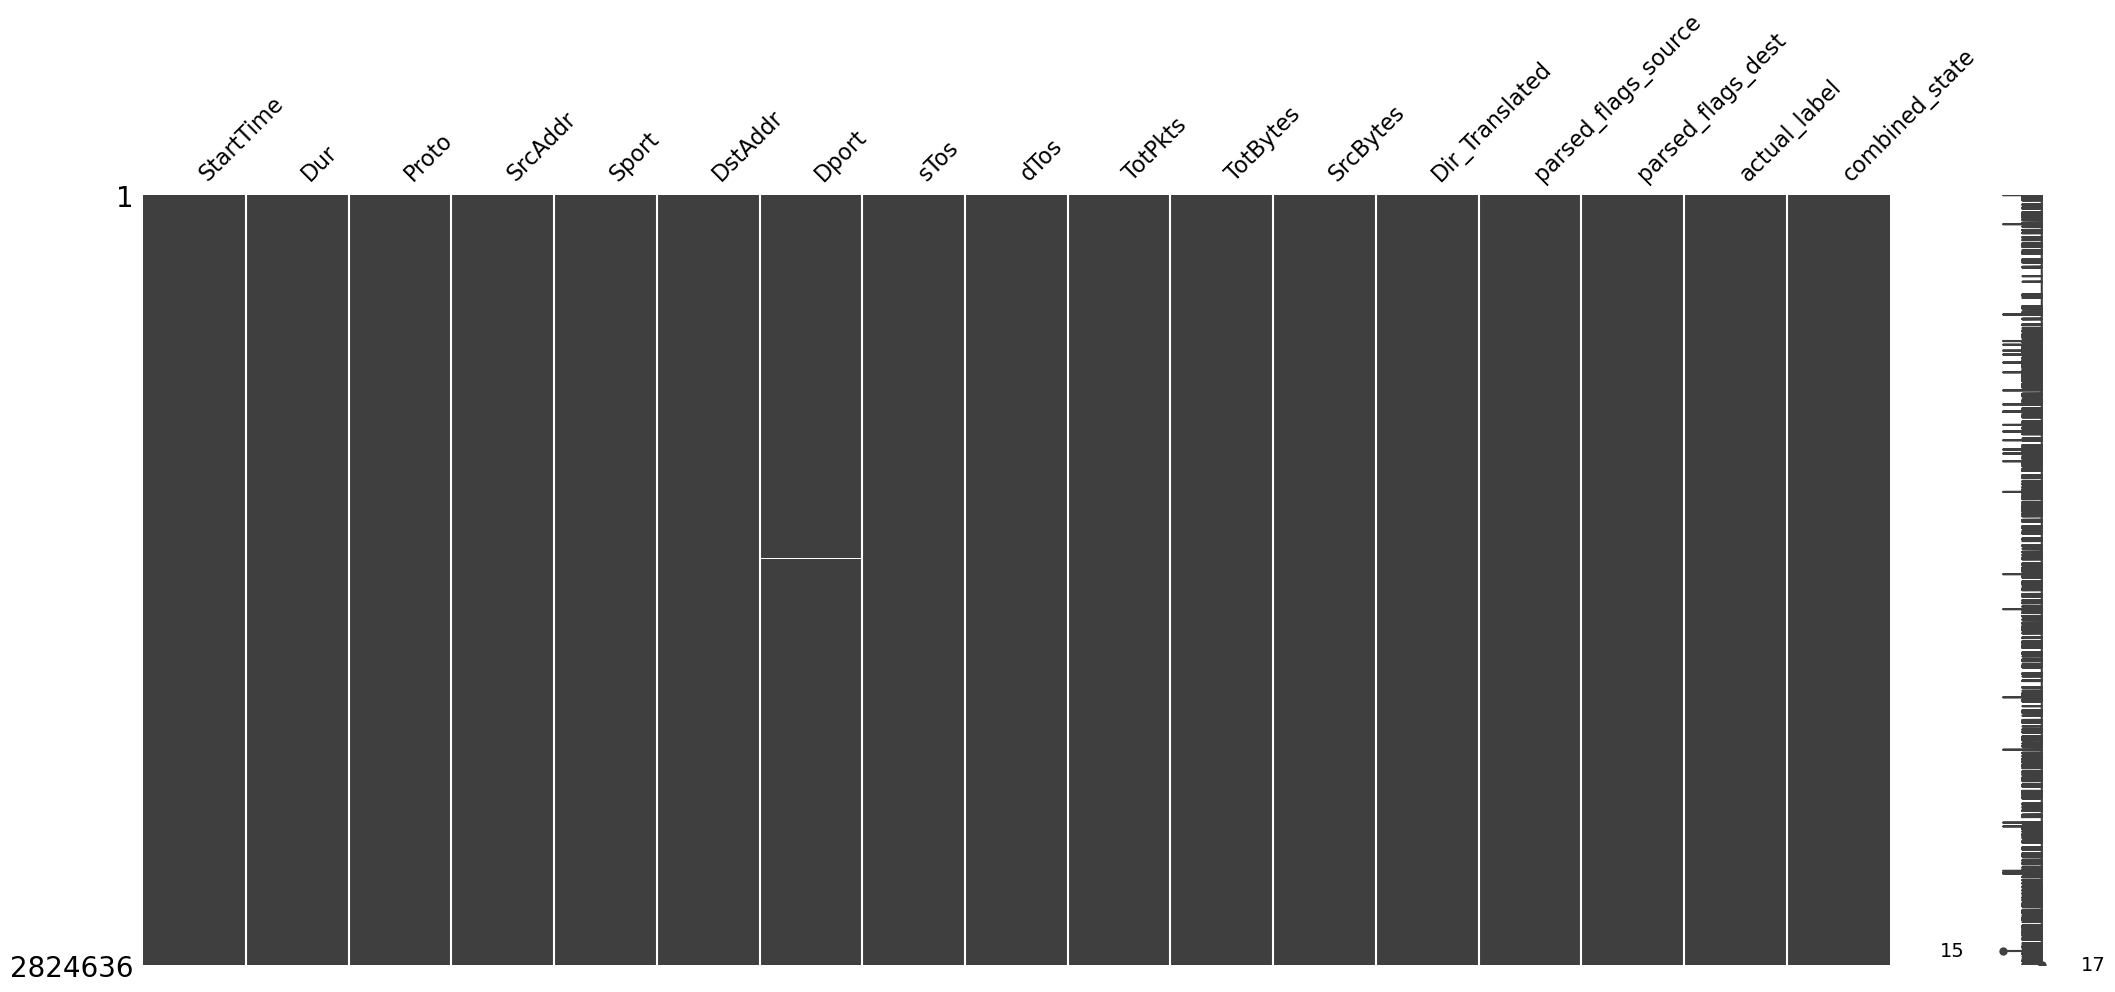

In [13]:
# Almost Final Visualization
import missingno as msno

# Visualize missing values with a matrix
def visualize_missing_matrix(df):
    plt.figure(figsize=(12, 8))
    msno.matrix(df)
    plt.show()

# Call the function on your DataFrame
visualize_missing_matrix(binetflow_clean_df)

Well done, now there's virtually no missing values!

In [30]:
# Checkpoint 3
# Saving dataframe to csv
# binetflow_clean_df.to_csv('complete_binetflow.csv', index=False)

# Load csv
binetflow_complete_df = pd.read_csv('complete_binetflow.csv')

In [18]:
binetflow_complete_df.isna().sum()/len(binetflow_complete_df)

StartTime              0.000000
Dur                    0.000000
Proto                  0.000000
SrcAddr                0.000000
Sport                  0.000008
DstAddr                0.000000
Dport                  0.000248
sTos                   0.000005
dTos                   0.000005
TotPkts                0.000000
TotBytes               0.000000
SrcBytes               0.000000
Dir_Translated         0.000000
parsed_flags_source    0.000000
parsed_flags_dest      0.000068
actual_label           0.000000
combined_state         0.000038
dtype: float64

At this point, the missing values in our dataset are most probably outliers, or missing at random. They only make a little portion of the whole dataset too, so I think it's safe if we just drop the rows with null values.

In [31]:
binetflow_complete_df = binetflow_complete_df.dropna()

<Figure size 1200x800 with 0 Axes>

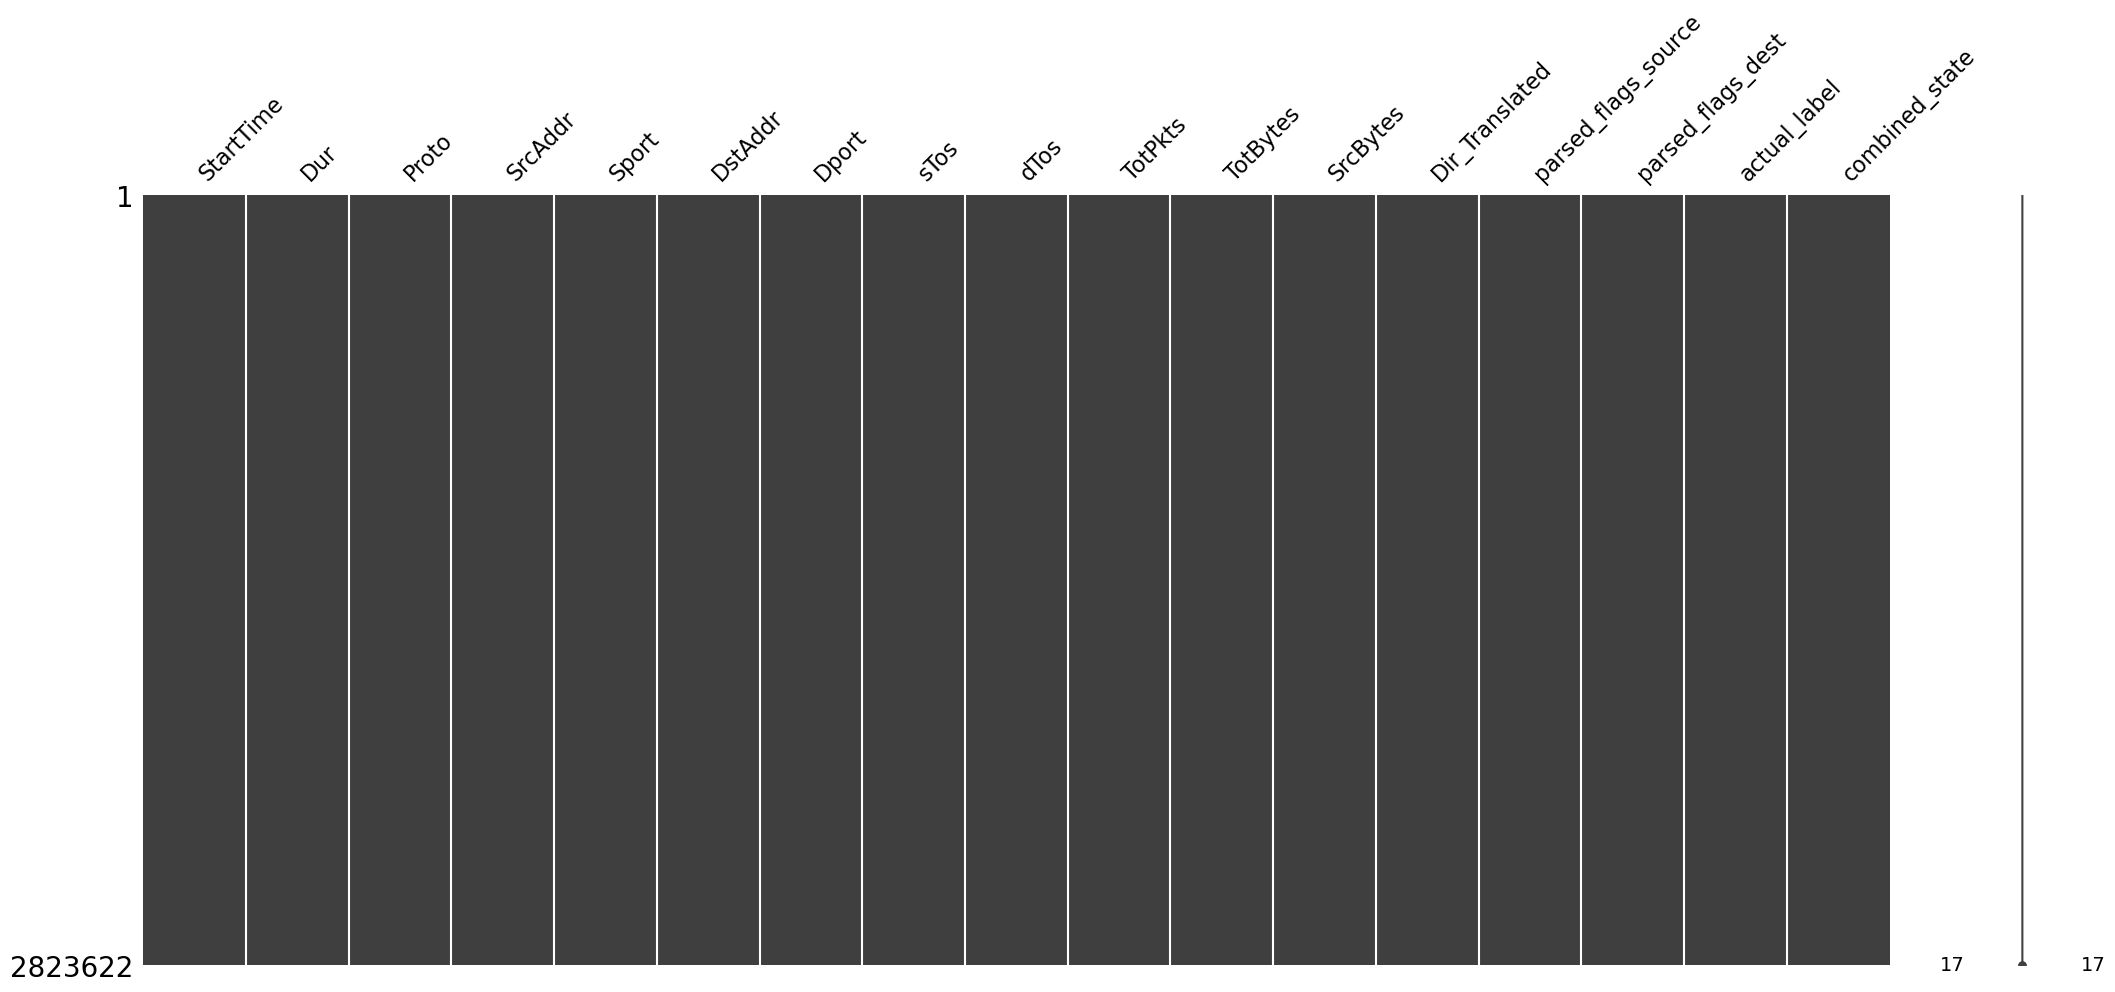

In [31]:
# Final Visualization
import missingno as msno

# Visualize missing values with a matrix
def visualize_missing_matrix(df):
    plt.figure(figsize=(12, 8))
    msno.matrix(df)
    plt.show()

# Call the function on your DataFrame
visualize_missing_matrix(binetflow_complete_df)

## Numerical Features Exploration

We've explored quite a lot of features, mostly categorical. Now, let's focus our attention on numerical columns, specifically for this section: outliers.

In [5]:
binetflow_complete_df.head()

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Dir_Translated,parsed_flags_source,parsed_flags_dest,actual_label,combined_state
0,2011-08-10 09:46:59.607825,1.026539,tcp,94.44.127.113,1577,147.32.84.59,6881,0.0,0.0,4,276,156,normal outbound,Syn,Reset Ack,Background,Invalid
1,2011-08-10 09:47:00.634364,1.009595,tcp,94.44.127.113,1577,147.32.84.59,6881,0.0,0.0,4,276,156,normal outbound,Syn,Reset Ack,Background,Invalid
2,2011-08-10 09:47:48.185538,3.056586,tcp,147.32.86.89,4768,77.75.73.33,80,0.0,0.0,3,182,122,normal outbound,Syn Reset,Ack,Background,Invalid
3,2011-08-10 09:47:48.230897,3.111769,tcp,147.32.86.89,4788,77.75.73.33,80,0.0,0.0,3,182,122,normal outbound,Syn Reset,Ack,Background,Invalid
4,2011-08-10 09:47:48.963351,3.083411,tcp,147.32.86.89,4850,77.75.73.33,80,0.0,0.0,3,182,122,normal outbound,Syn Reset,Ack,Background,Invalid


In [32]:
# I don't know this keeps happening but I need to re-cast the datatype again...

binetflow_complete_df['StartTime'] = pd.to_datetime(binetflow_complete_df['StartTime'])
binetflow_complete_df['sTos'] = binetflow_complete_df['sTos'].astype('category')
binetflow_complete_df['dTos'] = binetflow_complete_df['dTos'].astype('category')
binetflow_complete_df['Proto'] = binetflow_complete_df['Proto'].astype('category')
binetflow_complete_df['Dir_Translated'] = binetflow_complete_df['Dir_Translated'].astype('category')
binetflow_complete_df['actual_label'] = binetflow_complete_df['actual_label'].astype('category')
binetflow_complete_df['Sport'] = binetflow_complete_df['Sport'].astype('category')
binetflow_complete_df['Dport'] = binetflow_complete_df['Dport'].astype('category')
binetflow_complete_df['combined_state'] = binetflow_complete_df['combined_state'].astype('category')

In [7]:
binetflow_complete_df.dtypes

StartTime              datetime64[ns]
Dur                           float64
Proto                        category
SrcAddr                        object
Sport                        category
DstAddr                        object
Dport                        category
sTos                         category
dTos                         category
TotPkts                         int64
TotBytes                        int64
SrcBytes                        int64
Dir_Translated               category
parsed_flags_source            object
parsed_flags_dest              object
actual_label                 category
combined_state               category
dtype: object

In [33]:
# Subset DataFrame to only numerical columns
numerical_df = binetflow_complete_df.select_dtypes(include=['number'])
numerical_df.head()

,Dur,TotPkts,TotBytes,SrcBytes
0,1.026539,4,276,156
1,1.009595,4,276,156
2,3.056586,3,182,122
3,3.111769,3,182,122
4,3.083411,3,182,122


### Correlation Matrix

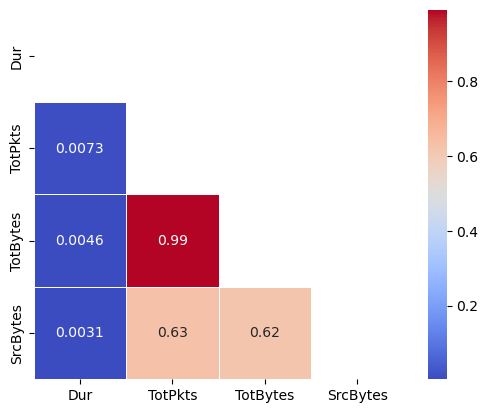

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.show()

We found redundant features! Total Bytes and Total Packets are almost perfectly correlated with each other. This is because you can calculate the value of one from the other (packet = X bytes).

In [34]:
numerical_df.drop('TotPkts', axis=1, inplace=True)

In [35]:
binetflow_complete_df.drop('TotPkts', axis=1, inplace=True)

### Plotting Distribution

In [9]:
numerical_df.describe().round(1)

,Dur,TotBytes,SrcBytes
count,2823622.0,2.823622e+06,2.823622e+06
mean,432.1,1.929800e+04,4.156500e+03
std,995.7,3.212762e+06,1.858864e+06
min,0.0,6.000000e+01,0.000000e+00
25%,0.0,2.140000e+02,7.800000e+01
50%,0.0,2.610000e+02,8.200000e+01
75%,9.0,5.890000e+02,2.610000e+02
max,3600.0,2.689640e+09,2.635366e+09


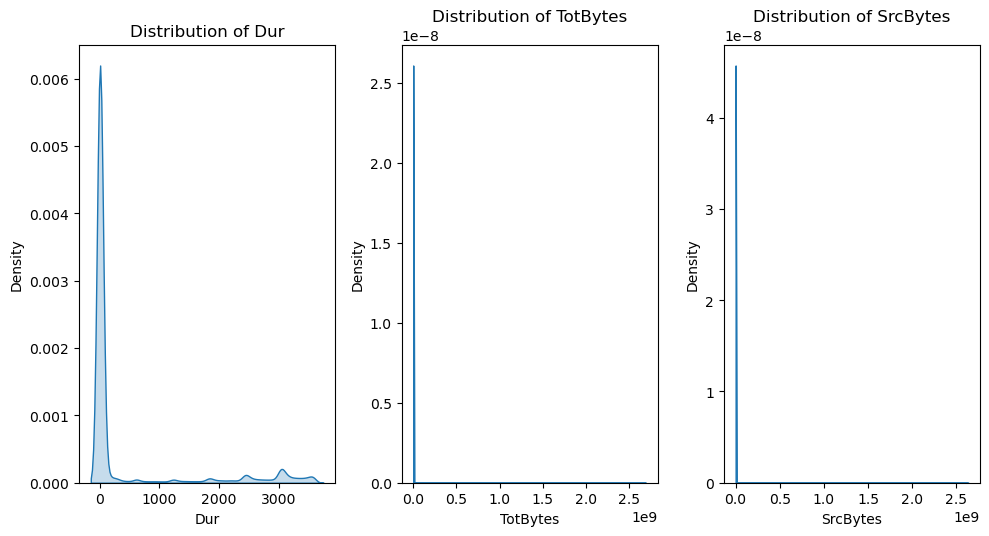

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of rows and columns for subplots
num_columns = numerical_df.shape[1]
num_rows = (num_columns // 3) + 1
fig, axes = plt.subplots(num_rows, 3, figsize=(10, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_df.columns):
    sns.kdeplot(numerical_df[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There's definitely something wrong with the total bytes and source bytes that make the visualization so skewed.


### Transformation and Binning

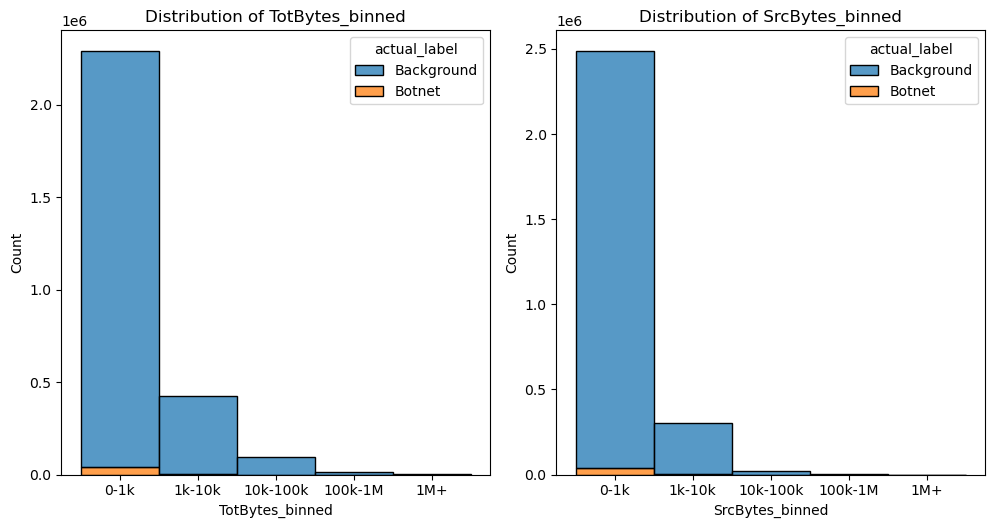

In [37]:
# Define bin edges and labels
bin_edges = [0, 1000, 10000, 100000, 1000000, float('inf')]
bin_labels = ['0-1k', '1k-10k', '10k-100k', '100k-1M', '1M+']

# Bin the data
numerical_df['TotBytes_binned'] = pd.cut(numerical_df['TotBytes'], bins=bin_edges, labels=bin_labels)
numerical_df['SrcBytes_binned'] = pd.cut(numerical_df['SrcBytes'], bins=bin_edges, labels=bin_labels)
numerical_df['actual_label'] = binetflow_complete_df['actual_label']

# Visualization
# Set the number of rows and columns for subplots
num_columns = numerical_df.shape[1]
num_rows = (num_columns // 3) + 1
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()

columns = ['TotBytes_binned', 'SrcBytes_binned']
for i, col in enumerate(columns):
    sns.histplot(data=numerical_df, ax=axes[i], fill=True, hue='actual_label', x=numerical_df[col], multiple='stack')
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

It seems like most of the communcation has sent less than 1 kilobyte packets. Maybe up to 10 kilobytes but anything after that is more likely an outlier

In [38]:
# Transforming numerical_df

transformed_numerical = numerical_df.copy()
transformed_numerical['Dur'] = np.log1p(transformed_numerical['Dur'])
transformed_numerical['SrcBytes'] = np.log1p(transformed_numerical['SrcBytes'])
transformed_numerical['TotBytes'] = np.log1p(transformed_numerical['TotBytes'])
transformed_numerical['actual_label'] = binetflow_complete_df['actual_label']
# sns.kdeplot(data=transformed_numerical, x='Dur', hue='actual_label')
# plt.show()

In [39]:
transformed_numerical.dtypes

Dur                 float64
TotBytes            float64
SrcBytes            float64
TotBytes_binned    category
SrcBytes_binned    category
actual_label       category
dtype: object

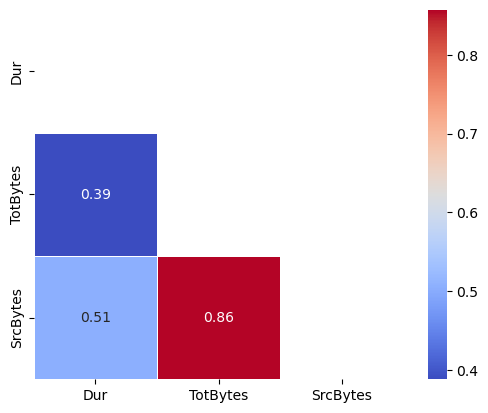

In [27]:
corr_matrix = transformed_numerical.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.show()

It seems like after all duration and bytes sent have a positive (albeit weak) correlation with each other. Total bytes and Source bytes are strongly correlated but not a perfect fit for each other. I will be keeping them for now

### IQR Calculation and Outlier Removal

In [40]:
def handle_outliers(df, method='find'):
    numerical_cols = df.select_dtypes(include=['number']).columns
    outliers_dict = {}
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'find':
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            if not outliers.empty:
                outliers_dict[col] = outliers
        elif method == 'clip':
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    if method == 'find':
        return outliers_dict
    elif method == 'clip':
        return df

In [41]:
outliers = handle_outliers(transformed_numerical, method='find')

# Print outliers if using 'find' method
if outliers:
    for col, outlier_df in outliers.items():
        print(f"Number of outliers in {col}:")
        print(len(outlier_df))

Number of outliers in Dur:
497030
Number of outliers in TotBytes:
270537
Number of outliers in SrcBytes:
191730


In [21]:
outlier_df['actual_label'].value_counts()

actual_label
Background    191353
Botnet           377
Name: count, dtype: int64

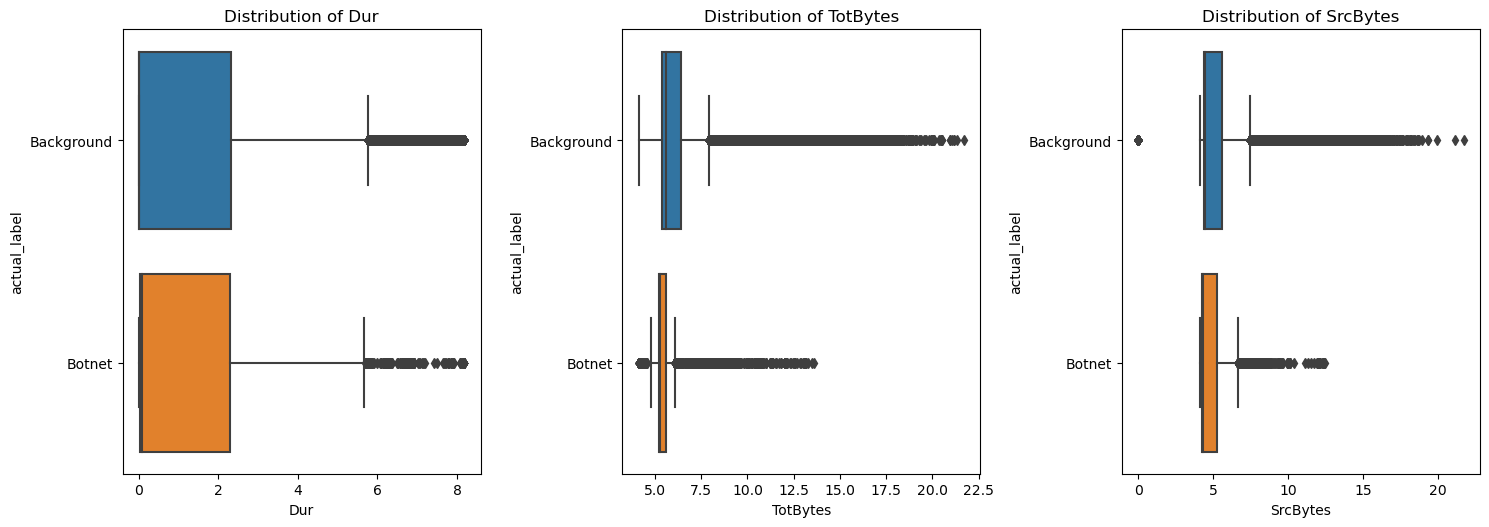

In [42]:
# Visualization
# Set the number of rows and columns for subplots
num_columns = transformed_numerical.shape[1]
num_rows = (num_columns // 3) + 1
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(transformed_numerical.select_dtypes(include=['number']).columns):
    sns.boxplot(data=transformed_numerical, ax=axes[i], y='actual_label', x=transformed_numerical[col])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

It seems like the distribution of both background and botnet traffics are more or less the same. The biggest difference lies on the sent packets in bytes by the botnet. It seems like the botnet's network performance is limited to 12 (mind you this is from a log-transformed data so 12 here doesn't exactly mean 12 bytes). If we remove any data that exceeds that threshold, we can still keep insights on the botnet's behavior but still getting rid of a portion of the data!

In [43]:
# Assume your threshold in the log-transformed data is 15 or 20 (example)
log_threshold = 12

# Filter the original dataset using this threshold
cleaned_transformed_df = transformed_numerical[
    (transformed_numerical['TotBytes'] <= log_threshold) &
    (transformed_numerical['SrcBytes'] <= log_threshold)
]

# Check how many rows remain
print("Rows after removing outliers from original dataset:", cleaned_transformed_df.shape)

Rows after removing outliers from original dataset: (2813164, 6)


In [29]:
log_threshold = 12
# Invert the transformation to get the threshold in the original scale
original_threshold = np.expm1(log_threshold)

print(f"Threshold in original scale: {original_threshold}")

# Filter the original dataset using this threshold
cleaned_original_df = binetflow_complete_df[
    (binetflow_complete_df['TotBytes'] <= original_threshold) &
    (binetflow_complete_df['SrcBytes'] <= original_threshold)
]

# Check how many rows remain
print("Rows after removing outliers from original dataset:", cleaned_original_df.shape)

Threshold in original scale: 162753.79141900392
Rows after removing outliers from original dataset: (2813164, 16)


In [45]:
from scipy import stats

threshold = 3
z_scores = np.abs(stats.zscore(cleaned_original_df.select_dtypes(include=['number'])))
outliers = (z_scores > threshold).any(axis=1)
print("Outliers:", (z_scores > threshold).sum(axis=0))

cleaned_original_df = cleaned_original_df[~outliers]
cleaned_original_df.shape

Outliers: Dur         51061
TotBytes    44554
SrcBytes    22556
dtype: int64


(2713777, 16)

In [73]:
# Checkpoint 4 bcs all of that was kinda destructive
# Save to csv
# cleaned_original_df.to_csv('complete_no_outlier_binetflow.csv', index=False)

# Load
binetflow_ready_df = pd.read_csv('complete_no_outlier_binetflow.csv')

## Reducing Numerosity

It's time to reduce the dataset into a smaller portion of it. Let's be honest, a 6 hours long packet capture with mostly background traffic is pretty huge and mostly consist of traffics that might not be of our interest. We will be reducing numerosity on this section.

### Duplicate Data Removal

Duplicates might be hard to spot with the naked eye because it seems like almost all the 3 million rows are unique, since they have differing start time. But upon quick inspection of the first 5 rows of the dataset, it can be seen that the first 2 rows basically tell the same story (client is initiating communication through TCP). They just have different start time since the tool captures the same event on different time. 

In [50]:
# I don't know how this keeps happening but I need to re-cast the datatype again...

binetflow_ready_df['StartTime'] = pd.to_datetime(binetflow_ready_df['StartTime'])
binetflow_ready_df['sTos'] = binetflow_ready_df['sTos'].astype('category')
binetflow_ready_df['dTos'] = binetflow_ready_df['dTos'].astype('category')
binetflow_ready_df['Proto'] = binetflow_ready_df['Proto'].astype('category')
binetflow_ready_df['Dir_Translated'] = binetflow_ready_df['Dir_Translated'].astype('category')
binetflow_ready_df['actual_label'] = binetflow_ready_df['actual_label'].astype('category')
binetflow_ready_df['Sport'] = binetflow_ready_df['Sport'].astype('category')
binetflow_ready_df['Dport'] = binetflow_ready_df['Dport'].astype('category')
binetflow_ready_df['combined_state'] = binetflow_ready_df['combined_state'].astype('category')

In [51]:
binetflow_ready_df.dtypes

StartTime              datetime64[ns]
Dur                           float64
Proto                        category
SrcAddr                        object
Sport                        category
DstAddr                        object
Dport                        category
sTos                         category
dTos                         category
TotBytes                        int64
SrcBytes                        int64
Dir_Translated               category
parsed_flags_source            object
parsed_flags_dest              object
actual_label                 category
combined_state               category
dtype: object

In [132]:
binetflow_ready_df.shape

(2713777, 16)

In [53]:
key_columns = ['Dur', 'Proto', 'SrcAddr', 'Sport', 'DstAddr', 'Dport', 'sTos', 'dTos',
       'TotBytes', 'SrcBytes', 'Dir_Translated',
       'parsed_flags_source', 'parsed_flags_dest', 'actual_label',
       'combined_state']
duplicates = binetflow_ready_df[binetflow_ready_df.duplicated(subset=key_columns, keep=False)]

# Display duplicates
print(len(duplicates))

50372


In [54]:
binetflow_ready_df.drop_duplicates(subset=key_columns)
binetflow_ready_df.shape

(2713777, 16)

In [7]:
binetflow_ready_df['actual_label'].value_counts(normalize=True)

actual_label
Background    0.98547
Botnet        0.01453
Name: proportion, dtype: float64

### Sampling

What if I tried sampling the data but keep the distribution of the label using stratified sampling?

In [55]:
from sklearn.model_selection import train_test_split

# Define the column(s) to stratify by
stratify_column = 'actual_label' 

# Perform stratified sampling
_, binetflow_sample = train_test_split(binetflow_ready_df, test_size=0.01, stratify=binetflow_ready_df[stratify_column], random_state=18)

# Display the distribution of the stratified sample
print(binetflow_sample[stratify_column].value_counts(normalize=True))
print(binetflow_sample.shape)

actual_label
Background    0.984966
Botnet        0.015034
Name: proportion, dtype: float64
(27138, 16)


In [87]:
# Checkpoint 5
# Save as csv
#binetflow_sample.drop('cluster', axis=1, inplace=True)
#binetflow_sample.to_csv('sampled_binetflow.csv', index=False)

# Load
binetflow_final = pd.read_csv('sampled_binetflow.csv')

## PCA

In [78]:
binetflow_final.nunique()

StartTime              27138
Dur                    13523
Proto                      9
SrcAddr                11046
Sport                  19242
DstAddr                 3619
Dport                   3003
sTos                       6
dTos                       6
TotBytes                3657
SrcBytes                2209
Dir_Translated             6
parsed_flags_source       21
parsed_flags_dest         20
actual_label               2
combined_state            13
dtype: int64

In [88]:
binetflow_final['StartTime'] = pd.to_datetime(binetflow_final['StartTime'])
binetflow_final['sTos'] = binetflow_final['sTos'].astype('category')
binetflow_final['dTos'] = binetflow_final['dTos'].astype('category')
binetflow_final['Proto'] = binetflow_final['Proto'].astype('category')
binetflow_final['Dir_Translated'] = binetflow_final['Dir_Translated'].astype('category')
binetflow_final['actual_label'] = binetflow_final['actual_label'].astype('category')
binetflow_final['Sport'] = binetflow_final['Sport'].astype('category')
binetflow_final['Dport'] = binetflow_final['Dport'].astype('category')
binetflow_final['combined_state'] = binetflow_final['combined_state'].astype('category')

### Preprocessing

Before doing PCA, we need to preprocess the categorical columns. I use frequency encoding for categorical columns with too many columns and are not ordinal (ports). I then use ordinal encoding for ordinal columns (ToS). I then use One-Hot Encoding for the rest of the categorical columns which spike up the number of columns. But don't worry, we'll use PCA to simplify things back again. Maybe PCA can see some patterns I can't see with naked eye.

In [89]:
# Encoding Categorical Values
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Frequency Encoding
for col in ['Sport', 'Dport']:
    binetflow_final[f'{col}_frequency'] = binetflow_final[col].map(binetflow_final[col].value_counts() / len(binetflow_final))

# Orinal Encoding
ordinal_features = ['sTos', 'dTos']
oe = OrdinalEncoder()
binetflow_final[ordinal_features] = oe.fit_transform(binetflow_final[ordinal_features])

# One-Hot Encoding
binetflow_final = pd.get_dummies(binetflow_final, columns=['Proto', 'Dir_Translated', 'parsed_flags_source', 'parsed_flags_dest', 'combined_state'], drop_first=True)

In [105]:
# Collect all encoded columns
# Frequency Encoding columns
frequency_encoded_cols = [f'{col}_frequency' for col in ['Sport', 'Dport']]

# Ordinal Encoding columns
ordinal_encoded_cols = ['sTos', 'dTos']

# One-Hot Encoding columns (after dropping the first category to avoid multicollinearity)
one_hot_encoded_cols = [col for col in binetflow_final.columns if col.startswith(('Proto_', 'Dir_Translated_', 'parsed_flags_source_', 'parsed_flags_dest_', 'combined_state_'))]

# Combine all encoded columns
all_encoded_cols = frequency_encoded_cols + ordinal_encoded_cols + one_hot_encoded_cols

# Create a DataFrame with these encoded columns
encoded_categorical_df = binetflow_final[all_encoded_cols].copy()

In [108]:
from sklearn.preprocessing import StandardScaler

numerical_columns = binetflow_final.select_dtypes(include=['number']).columns
numerical_df = binetflow_final[numerical_columns].copy()
df_combined = pd.concat([numerical_df, encoded_categorical_df], axis=1)

scaler = StandardScaler()
df_combined_scaled = df_combined.copy()
df_combined_scaled[numerical_columns] = scaler.fit_transform(df_combined[numerical_columns])

Explained variance by components: [0.27743055 0.22737005 0.16662494 0.10309661 0.09897734 0.05868146
 0.02922132]
Cumulative sum: [0.27743055 0.5048006  0.67142553 0.77452214 0.87349948 0.93218094
 0.96140226]
Total explained variance: 0.9614022648434788


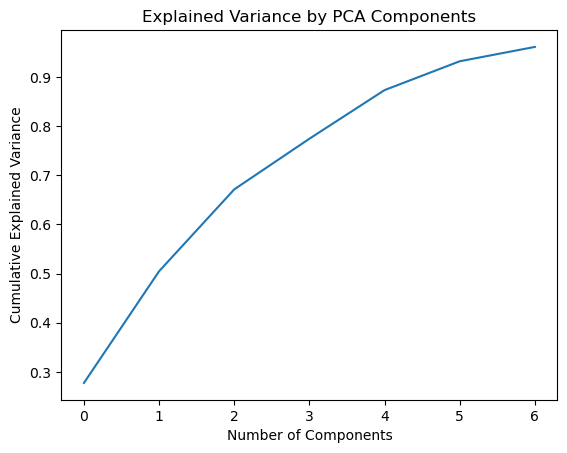

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=0.95)  # Retain enough components to explain 95% variance
df_pca = pca.fit_transform(df_combined_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
print(f'Explained variance by components: {explained_variance}')
print(f'Cumulative sum: {cumulative_explained_variance}')
print(f'Total explained variance: {sum(explained_variance)}')

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

We have succesfully reduced the lengthy 75 columns to just 7 columns that can explain the variance of the dataset quite well, up until 95% of the variance. 

### Background vs Botnet

Exploring some key features the Background and Botnet traffics seem to have and differ from each other.

In [120]:
binetflow_final = pd.read_csv('sampled_binetflow.csv')

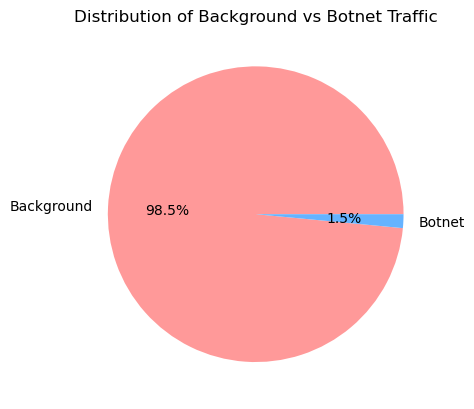

In [121]:
import matplotlib.pyplot as plt

label_counts = binetflow_final['actual_label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Background vs Botnet Traffic')
plt.show()

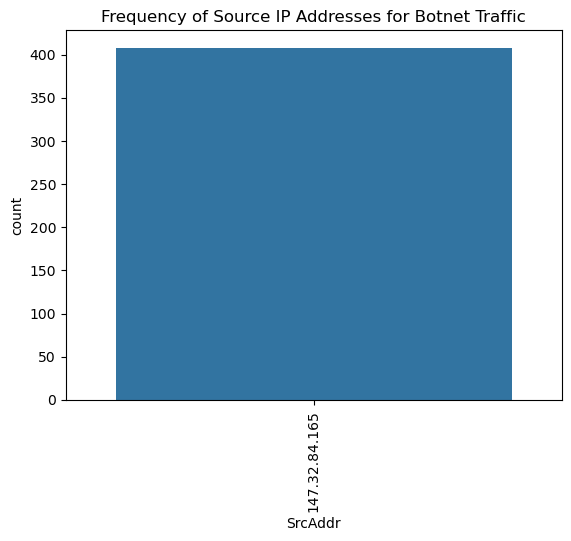

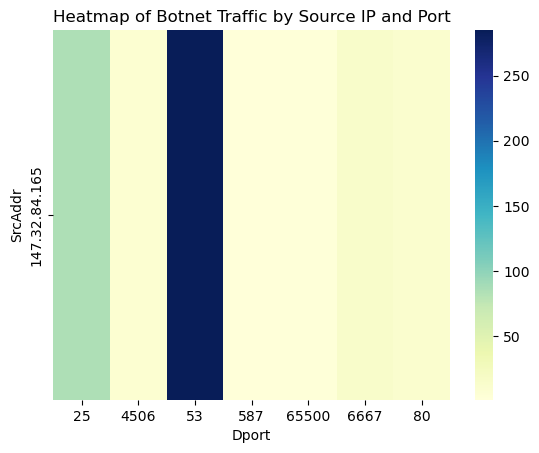

In [131]:
import seaborn as sns

# Filter for botnet traffic
botnet_df = binetflow_final[binetflow_final['actual_label'] == 'Botnet']

# Plot frequency of source IP addresses
sns.countplot(data=botnet_df, x='SrcAddr')
plt.xticks(rotation=90)
plt.title('Frequency of Source IP Addresses for Botnet Traffic')
plt.show()

# If you want to use a heatmap for IPs
# First, you might need to aggregate the data based on IP addresses
# Example:
ip_heatmap_data = botnet_df.groupby(['SrcAddr', 'Dport']).size().unstack(fill_value=0)
sns.heatmap(ip_heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Botnet Traffic by Source IP and Port')
plt.show()

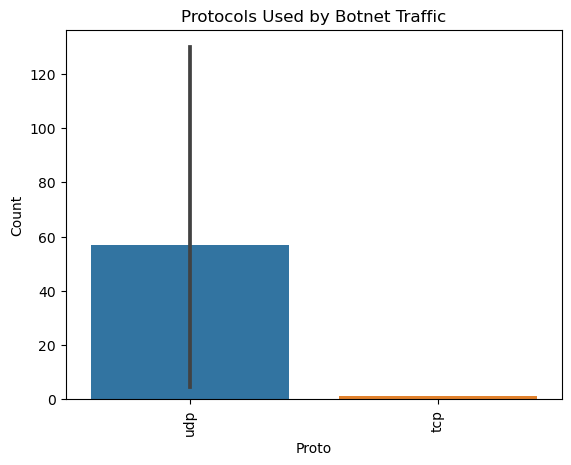

In [127]:
# Filter for botnet traffic
botnet_df = binetflow_final[binetflow_final['actual_label'] == 'Botnet']
ports_protocols = botnet_df.groupby(['Sport', 'Proto']).size().reset_index(name='Count')

sns.barplot(data=ports_protocols, x='Proto', y='Count')
plt.xticks(rotation=90)
plt.title('Protocols Used by Botnet Traffic')
plt.show()

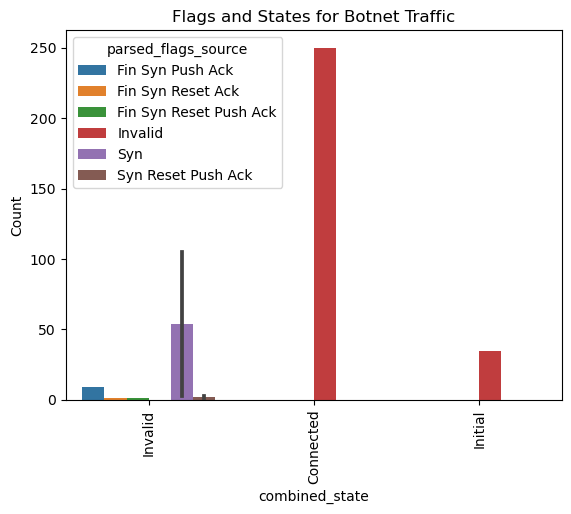

In [130]:
# Filter for botnet traffic
botnet_df = binetflow_final[binetflow_final['actual_label'] == 'Botnet']
flags_states = botnet_df.groupby(['parsed_flags_source', 'parsed_flags_dest', 'combined_state']).size().reset_index(name='Count')

sns.barplot(data=flags_states, x='combined_state', y='Count', hue='parsed_flags_source')
plt.xticks(rotation=90)
plt.title('Flags and States for Botnet Traffic')
plt.show()

Insights:

1. Data is heavily imbalanced, majority of data is background traffic.
2. The Neris malware only infects one computer with the IP address: 147.32.84.165, it frequently uses the port 25 (SMTP) and 53 (DNS).
3. Neris mostly uses UDP rather than TCP.
4. Most flags are initialization/synchronization flags, nothing particularly unusual. 
5. Packets sent by Neris are limited to only a few kilobytes and its packet sent distribution closely ressembles that of background traffics.

## Credits

"An empirical comparison of botnet detection methods" Sebastian Garcia, Martin Grill, Jan Stiborek and Alejandro Zunino. Computers and Security Journal, Elsevier. 2014. Vol 45, pp 100-123. http://dx.doi.org/10.1016/j.cose.2014.05.011